In [1]:
### Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines
from matplotlib.patches import Ellipse
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Profumo

In [2]:
import pandas as pd

# Generate a date range from '1962-01-01' to '1965-12-31' - easier to work with
date_range = pd.date_range(start='1961-01-01', end='1963-12-31', freq='D')

# Calculate the week numbers based on groups of 7 days
week_numbers = ((date_range - date_range[0]).days // 7) + 1

# Create an empty DataFrame with the date range as the index
empty_df = pd.DataFrame(index=date_range)

# Assign the calculated week numbers
empty_df['week'] = week_numbers


# Reset the index to make 'PubDate' a regular column
empty_df = empty_df.reset_index()

# Rename the 'index' column to 'PubDate'
empty_df = empty_df.rename(columns={'index': 'PubDate'})

print(empty_df)


        PubDate  week
0    1961-01-01     1
1    1961-01-02     1
2    1961-01-03     1
3    1961-01-04     1
4    1961-01-05     1
...         ...   ...
1090 1963-12-27   156
1091 1963-12-28   156
1092 1963-12-29   157
1093 1963-12-30   157
1094 1963-12-31   157

[1095 rows x 2 columns]


In [3]:
df = pd.read_csv("Profumo_newsearch.csv")

In [4]:
df.head()

,Title,Subtitle,Author,Publication,SourceType,Publisher,Volume,Issue,PubDate,AlphaDate,StartPage,EndPage,PageRange,ISSN,EISSN,ISBN,Language,DocumentUrl,DOI
0,Gilts and equities lose ground,Response to Profumo affair,NaN,The Guardian (1959-2003),Historical Newspapers,NaN,NaN,NaN,1963-06-11,"Jun 11, 1963",10,NaN,NaN,02613077,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
1,Whatever happened to Victorian values?,NICHOLAS WAPSHOTT argues that Tory sex scandal...,"WAPSHOTT, NICHOLAS",The Observer (1901- 2003),Historical Newspapers,NaN,NaN,NaN,1987-07-26,"Jul 26, 1987",8,NaN,NaN,00297712,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
2,Japan's PM in Profumo row,Hashimoto is said to have fallen into a honeyp...,"Higgins, Andrew",The Guardian (1959-2003),Historical Newspapers,NaN,NaN,NaN,1997-12-15,"Dec 15, 1997",12,NaN,NaN,02613077,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
3,Turning a deaf ear to the roar of the jungle,MICHAEL WHITE says the Mates-Attali affair sho...,NaN,The Observer (1901- 2003),Historical Newspapers,NaN,NaN,NaN,1993-06-26,"Jun 26, 1993",23,NaN,NaN,00297712,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
4,Ml5 Profumo killing alleged,NaN,"Norton-Taylor, Richard",The Guardian (1959-2003),Historical Newspapers,NaN,NaN,NaN,1988-05-03,"May 3, 1988",7,NaN,NaN,02613077,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1963 non-null   object 
 1   Subtitle     392 non-null    object 
 2   Author       682 non-null    object 
 3   Publication  1963 non-null   object 
 4   SourceType   1963 non-null   object 
 5   Publisher    0 non-null      float64
 6   Volume       2 non-null      float64
 7   Issue        0 non-null      float64
 8   PubDate      1963 non-null   object 
 9   AlphaDate    1963 non-null   object 
 10  StartPage    1963 non-null   object 
 11  EndPage      0 non-null      float64
 12  PageRange    0 non-null      float64
 13  ISSN         1903 non-null   object 
 14  EISSN        0 non-null      float64
 15  ISBN         0 non-null      float64
 16  Language     1963 non-null   object 
 17  DocumentUrl  1963 non-null   object 
 18  DOI          0 non-null      float64
dtypes: flo

In [6]:
###convert pubdate to datetime
df['PubDate'] = pd.to_datetime(df['PubDate'], format='%Y/%m/%d')
df['PubDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1963 entries, 0 to 1962
Series name: PubDate
Non-Null Count  Dtype         
--------------  -----         
1963 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.5 KB


In [7]:
###sort by date
df = df.sort_values(by='PubDate')
df.head()

,Title,Subtitle,Author,Publication,SourceType,Publisher,Volume,Issue,PubDate,AlphaDate,StartPage,EndPage,PageRange,ISSN,EISSN,ISBN,Language,DocumentUrl,DOI
1925,"April 5, 1849 (Page 3 of 4)",NaN,NaN,(Page 3 of 4),Historical Newspapers,NaN,NaN,NaN,1849-04-05,"Apr 5, 1849",3,NaN,NaN,NaN,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
1939,"April 13, 1849 (Page 3 of 4)",NaN,NaN,(Page 3 of 4),Historical Newspapers,NaN,NaN,NaN,1849-04-13,"Apr 13, 1849",3,NaN,NaN,NaN,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
1640,"December 8, 1858 (Page 5 of 8)",NaN,NaN,(Page 5 of 8),Historical Newspapers,NaN,NaN,NaN,1858-12-08,"Dec 8, 1858",5,NaN,NaN,NaN,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
1758,"February 22, 1869 (Page 5 of 8)",NaN,NaN,(Page 5 of 8),Historical Newspapers,NaN,NaN,NaN,1869-02-22,"Feb 22, 1869",5,NaN,NaN,NaN,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
1903,"May 27, 1885 (Page 6 of 8)",NaN,NaN,(Page 6 of 8),Historical Newspapers,NaN,NaN,NaN,1885-05-27,"May 27, 1885",6,NaN,NaN,NaN,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN


In [8]:
# Filter the DataFrame to include only rows between 1962 and 1965
df = df[(df['PubDate'] >= '1962-01-01') & (df['PubDate'] <= '1965-12-31')].reset_index(drop=True)
# Sort the DataFrame by 'PubDate'
df = df.sort_values(by='PubDate')
# Add a new column 'occurrences' with a constant value of 1
df['occurrences'] = 1

In [9]:
df.head()

,Title,Subtitle,Author,Publication,SourceType,Publisher,Volume,Issue,PubDate,AlphaDate,StartPage,EndPage,PageRange,ISSN,EISSN,ISBN,Language,DocumentUrl,DOI,occurrences
0,"February 22, 1962 (Page 1 of 32)",NaN,NaN,(Page 1 of 32),Historical Newspapers,NaN,NaN,NaN,1962-02-22,"Feb 22, 1962",1,NaN,NaN,1472-5215,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN,1
1,"March 1, 1962 (Page 4 of 28)",NaN,NaN,(Page 4 of 28),Historical Newspapers,NaN,NaN,NaN,1962-03-01,"Mar 1, 1962",4,NaN,NaN,1472-5215,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN,1
2,Unsettled Ministers,Tuesday night,NaN,The Guardian (1959-2003),Historical Newspapers,NaN,NaN,NaN,1962-03-28,"Mar 28, 1962",10,NaN,NaN,02613077,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN,1
3,"May 10, 1962 (Page 1 of 32)",NaN,NaN,(Page 1 of 32),Historical Newspapers,NaN,NaN,NaN,1962-05-10,"May 10, 1962",1,NaN,NaN,1472-5215,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN,1
4,"May 24, 1962 (Page 4 of 28)",NaN,NaN,(Page 4 of 28),Historical Newspapers,NaN,NaN,NaN,1962-05-24,"May 24, 1962",4,NaN,NaN,1472-5215,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN,1


In [10]:
# Selecting only the 'PubDate' and 'occurrences' columns
df = df.loc[:, ['PubDate', 'occurrences']]
df

,PubDate,occurrences
0,1962-02-22,1
1,1962-03-01,1
2,1962-03-28,1
3,1962-05-10,1
4,1962-05-24,1
...,...,...
598,1965-09-03,1
599,1965-09-20,1
600,1965-11-19,1
601,1965-11-26,1


In [11]:
# Group by 'PubDate' and sum the 'occurrences'
df = df.groupby('PubDate', as_index=False)['occurrences'].sum()
print(df)

       PubDate  occurrences
0   1962-02-22            1
1   1962-03-01            1
2   1962-03-28            1
3   1962-05-10            1
4   1962-05-24            1
..         ...          ...
227 1965-09-03            1
228 1965-09-20            1
229 1965-11-19            1
230 1965-11-26            1
231 1965-12-12            1

[232 rows x 2 columns]


In [12]:
# Reset the index of empty_df to have 'weeks' as a regular column
empty_df.reset_index(inplace=True)

# Merge empty_df with df based on the 'PubDate' column
merged_df = pd.merge(empty_df, df[['PubDate', 'occurrences']], on='PubDate', how='left')

merged_df['occurrences'] = merged_df['occurrences'].fillna(0)

print(merged_df)


      index    PubDate  week  occurrences
0         0 1961-01-01     1          0.0
1         1 1961-01-02     1          0.0
2         2 1961-01-03     1          0.0
3         3 1961-01-04     1          0.0
4         4 1961-01-05     1          0.0
...     ...        ...   ...          ...
1090   1090 1963-12-27   156          0.0
1091   1091 1963-12-28   156          0.0
1092   1092 1963-12-29   157          1.0
1093   1093 1963-12-30   157          0.0
1094   1094 1963-12-31   157          1.0

[1095 rows x 4 columns]


### Add rolling occurence column - 3 day

In [13]:
# Calculate the rolling sum and create a new column with the result
merged_df['occurrences_rolling'] = merged_df['occurrences'].rolling(window=3, min_periods=1).mean()

### Add lag variables

In [14]:
# Assuming df is your DataFrame
merged_df['occurrences_lead1'] = merged_df['occurrences'].shift(-1)
# Assuming df is your DataFrame
merged_df['occurrences_lead2'] = merged_df['occurrences'].shift(-2)
# Assuming df is your DataFrame
merged_df['occurrences_lead3'] = merged_df['occurrences'].shift(-3)

### Remove rows before significant relevance

In [15]:
occurrence_1_df = merged_df[merged_df['occurrences'] > 2]
print(occurrence_1_df.head(10))
print(occurrence_1_df.tail(10))


     index    PubDate  week  occurrences  occurrences_rolling  \
886    886 1963-06-06   127          7.0             2.333333   
887    887 1963-06-07   127         10.0             5.666667   
888    888 1963-06-08   127          7.0             8.000000   
890    890 1963-06-10   128         15.0             7.666667   
891    891 1963-06-11   128         12.0             9.333333   
892    892 1963-06-12   128          9.0            12.000000   
893    893 1963-06-13   128          9.0            10.000000   
894    894 1963-06-14   128         11.0             9.666667   
895    895 1963-06-15   128         10.0            10.000000   
896    896 1963-06-16   129         15.0            12.000000   

     occurrences_lead1  occurrences_lead2  occurrences_lead3  
886               10.0                7.0                1.0  
887                7.0                1.0               15.0  
888                1.0               15.0               12.0  
890               12.0          

06-07-1963 - first significant relevance \
04-10-1963 - last significant relevance

In [16]:
# Filter rows where 'PubDate' is between June 4, 1963, and October 8, 1963
df_filtered = merged_df[(merged_df['PubDate'] >= '1963-06-04') & (merged_df['PubDate'] <= '1963-10-11')]

# FTSE DATA

In [18]:
ftse = pd.read_csv("profumo_ftse.csv")

In [19]:
ftse.head()

,Date,industrial_ord,all_share
0,01/06/1963,NaN,NaN
1,02/06/1963,NaN,NaN
2,03/06/1963,NaN,NaN
3,04/06/1963,312.3,99.73
4,05/06/1963,310.9,99.46


In [20]:
ftse['Date'] = pd.to_datetime(ftse['Date'], format='%d/%m/%Y')

### Combine datasets

In [21]:
df_relevance = df_filtered.copy()

In [22]:
df_relevance.rename(columns={'PubDate': 'Date'}, inplace=True)

In [23]:
#merge relevance and stock data
df = pd.merge(ftse, df_relevance, on='Date')

In [25]:
df.drop(columns=['index'], inplace=True)

In [26]:
df.head()

,Date,industrial_ord,all_share,week,occurrences,occurrences_rolling,occurrences_lead1,occurrences_lead2,occurrences_lead3
0,1963-06-04,312.3,99.73,127,0.0,0.000000,0.0,7.0,10.0
1,1963-06-05,310.9,99.46,127,0.0,0.000000,7.0,10.0,7.0
2,1963-06-06,311.0,99.24,127,7.0,2.333333,10.0,7.0,1.0
3,1963-06-07,309.6,98.70,127,10.0,5.666667,7.0,1.0,15.0
4,1963-06-08,NaN,NaN,127,7.0,8.000000,1.0,15.0,12.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 130 non-null    datetime64[ns]
 1   industrial_ord       93 non-null     float64       
 2   all_share            93 non-null     float64       
 3   week                 130 non-null    int64         
 4   occurrences          130 non-null    float64       
 5   occurrences_rolling  130 non-null    float64       
 6   occurrences_lead1    130 non-null    float64       
 7   occurrences_lead2    130 non-null    float64       
 8   occurrences_lead3    130 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 10.2 KB


In [28]:
df.head(10)

,Date,industrial_ord,all_share,week,occurrences,occurrences_rolling,occurrences_lead1,occurrences_lead2,occurrences_lead3
0,1963-06-04,312.3,99.73,127,0.0,0.000000,0.0,7.0,10.0
1,1963-06-05,310.9,99.46,127,0.0,0.000000,7.0,10.0,7.0
2,1963-06-06,311.0,99.24,127,7.0,2.333333,10.0,7.0,1.0
3,1963-06-07,309.6,98.70,127,10.0,5.666667,7.0,1.0,15.0
4,1963-06-08,NaN,NaN,127,7.0,8.000000,1.0,15.0,12.0
5,1963-06-09,NaN,NaN,128,1.0,6.000000,15.0,12.0,9.0
6,1963-06-10,302.6,96.87,128,15.0,7.666667,12.0,9.0,9.0
7,1963-06-11,307.2,97.83,128,12.0,9.333333,9.0,9.0,11.0
8,1963-06-12,305.8,97.44,128,9.0,12.000000,9.0,11.0,10.0
9,1963-06-13,303.7,96.88,128,9.0,10.000000,11.0,10.0,15.0


## Plotting graph

In [29]:
##save df to restore later after graph
df1 = df.copy()

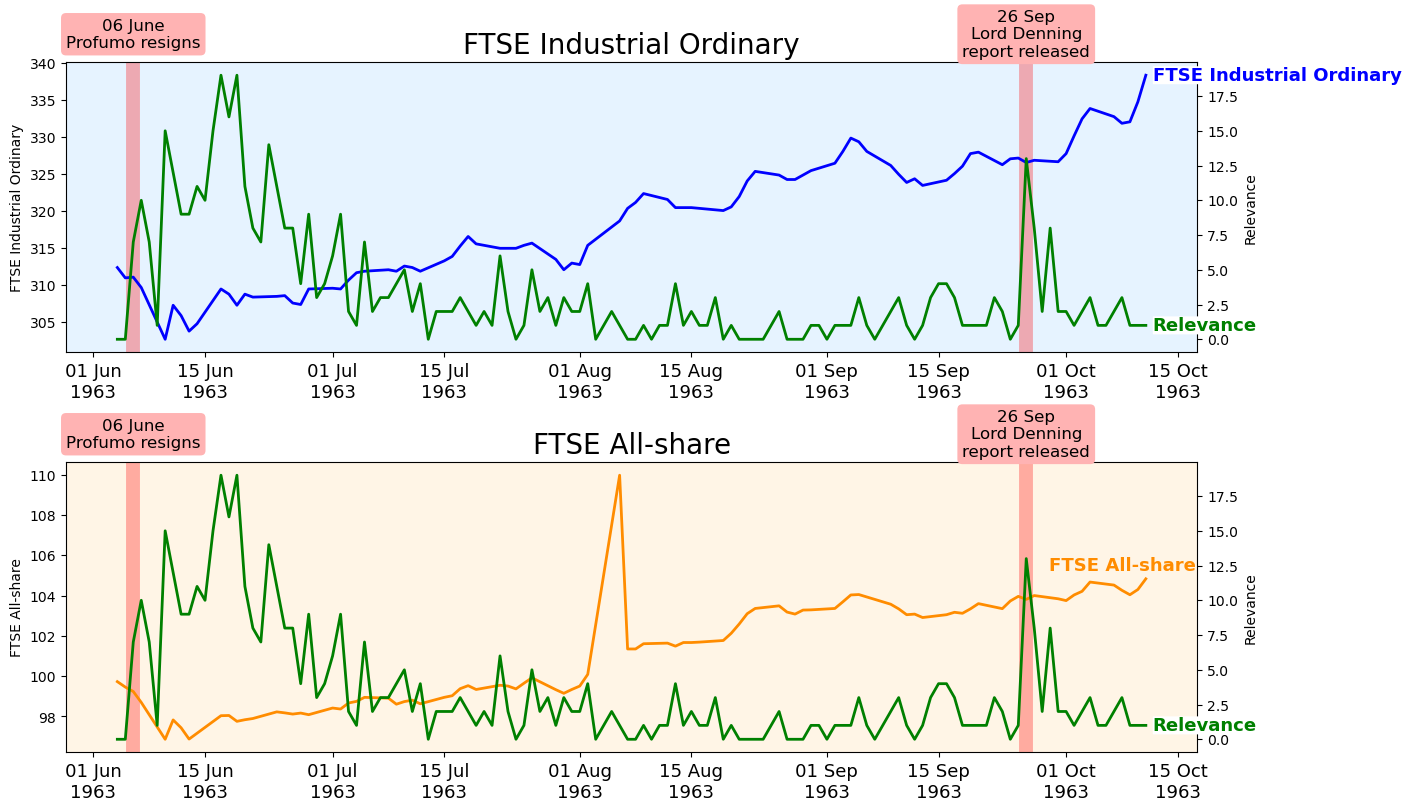

In [30]:
# Preprocessing to make plot work
df['industrial_ord'] = df['industrial_ord'].interpolate(method='linear')
df['all_share'] = df['all_share'].interpolate(method='linear')

plt.style.use('default')
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('1963-06-06'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax1.axvline(x=pd.Timestamp('1963-09-26'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df['Date'], df['industrial_ord'], label='Industrial Ordinary', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE Industrial Ordinary')
ax1.set_title('FTSE Industrial Ordinary', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df['Date'], df['occurrences'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

##annotate
ax1_relevance.annotate('06 June\nProfumo resigns',
            xy=(pd.Timestamp('1963-06-06'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax1_relevance.annotate('26 Sep\nLord Denning\nreport released',
            xy=(pd.Timestamp('1963-09-26'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE Industrial Ordinary', xy=(df['Date'].iloc[-1], df['industrial_ord'].iloc[-1]),
             xytext=(5, 0), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='white',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df['Date'].iloc[-1], df['occurrences'].iloc[-1]),
             xytext=(5, 0), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('1963-06-06'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax2.axvline(x=pd.Timestamp('1963-09-26'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df['Date'], df['all_share'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df['Date'], df['occurrences'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)



##annotate
ax2_relevance.annotate('06 June\nProfumo resigns',
            xy=(pd.Timestamp('1963-06-06'), ax2_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax2_relevance.annotate('26 Sep\nLord Denning\nreport released',
            xy=(pd.Timestamp('1963-09-26'), ax2_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df['Date'].iloc[-1], df['all_share'].iloc[-1]),
             xytext=(-70, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df['Date'].iloc[-1], df['occurrences'].iloc[-1]),
             xytext=(5, 0), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='white',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/ftse_profumo_graphFINAL.png')  # Save the figure in the "figures" folder
plt.show()
# Restore df
df = df1.copy()

### Save to CSV

In [31]:
df.to_csv('profumo_preprocessed.csv', index=False)

### Save to stata file

In [32]:
df.to_stata('profumo_preprocessed.dta', version=117) 